In [1]:
import pandas_datareader as pdr

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pdr.get_data_tiingo('NFTY', api_key = '8b4dc8427082d9ecb180cb2840316df12aa25f67')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('/content/drive/MyDrive/Stock Prediction/NFTY.csv')

In [5]:
df.tail()

close   high      low     open  volume  \
symbol date                                                                
NFTY   2022-07-11 00:00:00+00:00  42.00  42.00  42.0000  42.0000     120   
       2022-07-12 00:00:00+00:00  41.92  41.92  41.8901  41.8901     189   
       2022-07-13 00:00:00+00:00  41.60  41.60  41.3800  41.3800     544   
       2022-07-14 00:00:00+00:00  41.44  41.44  41.2800  41.2800    1049   
       2022-07-15 00:00:00+00:00  42.24  42.24  42.2400  42.2400      79   

                                  adjClose  adjHigh   adjLow  adjOpen  \
symbol date                                                             
NFTY   2022-07-11 00:00:00+00:00     42.00    42.00  42.0000  42.0000   
       2022-07-12 00:00:00+00:00     41.92    41.92  41.8901  41.8901   
       2022-07-13 00:00:00+00:00     41.60    41.60  41.3800  41.3800   
       2022-07-14 00:00:00+00:00     41.44    41.44  41.2800  41.2800   
       2022-07-15 00:00:00+00:00     42.24    42.24  42.2400  42.2400   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
NFTY   2022-07-11 00:00:00+00:00        120      0.0          1.0  
       2022-07-12 00:00:00+00:00        189      0.0          1.0  
       2022-07-13 00:00:00+00:00        544      0.0          1.0  
       2022-07-14 00:00:00+00:00       1049      0.0          1.0  
       2022-07-15 00:00:00+00:00         79      0.0          1.0

In [6]:
import pandas as pd

In [7]:
df1 = df.reset_index()['close']


In [8]:
df1.head()

0    39.03
1    37.84
2    37.63
3    38.10
4    37.83
Name: close, dtype: float64

In [9]:
len(df1)

1069

In [10]:
import matplotlib.pyplot as plt

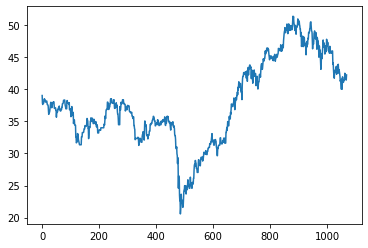

In [11]:
plt.plot(df1)

LSTM is sensitive to scale of data, so we apply MinMax Scaler

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [15]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [16]:
df1.shape

(1069, 1)

In [17]:
 training_size = int(len(df1) * 0.65)
 test_size = len(df1) - training_size
 train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [18]:
import numpy as np

def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step -1):
    a = dataset[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  
  return np.array(dataX), np.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [20]:
print(X_test.shape), print(y_test.shape)

(274, 100)
(274,)


(None, None)

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Creating a stacked LSTM Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model = Sequential()
model.add(LSTM(256, return_sequences=False, input_shape = (100, 1)))
model.add(Dense(8))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 8)                 2056      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 266,257
Trainable params: 266,257
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25, batch_size = 64, verbose = 2) 

Epoch 1/25
10/10 - 12s - loss: 0.0407 - mae: 0.1461 - val_loss: 0.0528 - val_mae: 0.2262 - 12s/epoch - 1s/step
Epoch 2/25
10/10 - 7s - loss: 0.0042 - mae: 0.0525 - val_loss: 0.0010 - val_mae: 0.0246 - 7s/epoch - 658ms/step
Epoch 3/25
10/10 - 5s - loss: 0.0022 - mae: 0.0365 - val_loss: 0.0152 - val_mae: 0.1185 - 5s/epoch - 454ms/step
Epoch 4/25
10/10 - 4s - loss: 0.0015 - mae: 0.0288 - val_loss: 0.0032 - val_mae: 0.0505 - 4s/epoch - 382ms/step
Epoch 5/25
10/10 - 4s - loss: 0.0012 - mae: 0.0257 - val_loss: 0.0044 - val_mae: 0.0601 - 4s/epoch - 379ms/step
Epoch 6/25
10/10 - 4s - loss: 9.7149e-04 - mae: 0.0224 - val_loss: 0.0021 - val_mae: 0.0401 - 4s/epoch - 382ms/step
Epoch 7/25
10/10 - 4s - loss: 8.9948e-04 - mae: 0.0218 - val_loss: 0.0018 - val_mae: 0.0359 - 4s/epoch - 380ms/step
Epoch 8/25
10/10 - 4s - loss: 8.1672e-04 - mae: 0.0206 - val_loss: 0.0013 - val_mae: 0.0296 - 4s/epoch - 382ms/step
Epoch 9/25
10/10 - 4s - loss: 7.9688e-04 - mae: 0.0207 - val_loss: 7.9889e-04 - val_mae: 0.02

## Prediction and checking performance metrics

In [26]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [27]:
train_predict.shape


(593, 1)

In [28]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#### Calculate RMSE

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

32.80625295844697

In [30]:
math.sqrt(mean_squared_error(y_test, test_predict))

45.31759114632949

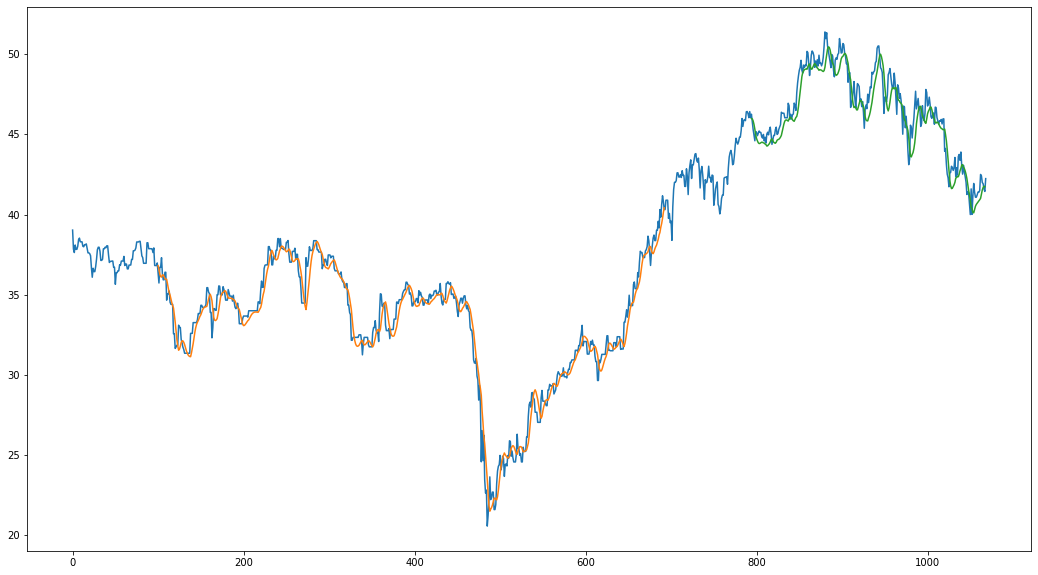

In [31]:
look_back = 100
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Shift Test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2) + 1:len(df1) - 1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(18, 10))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
len(test_data)


375

In [33]:
x_input=test_data[274:].reshape(1,-1)
x_input.shape

(1, 101)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input


[0.8750811161583387,
 0.8617780661907852,
 0.8387443218689163,
 0.7929915639195326,
 0.849935107073329,
 0.8481505515898768,
 0.8059636599610642,
 0.8293316028552888,
 0.8009409474367295,
 0.759993510707333,
 0.7313432835820897,
 0.7424075275794939,
 0.8112459441920832,
 0.8064243997404283,
 0.7853049967553536,
 0.8070603504218041,
 0.8251135626216743,
 0.8530175210902011,
 0.8799480856586632,
 0.8442569759896172,
 0.8546398442569758,
 0.8653471771576899,
 0.8426346528228423,
 0.8475016223231668,
 0.8087183646982479,
 0.8140817650876053,
 0.8507462686567164,
 0.8270603504218041,
 0.8205710577547047,
 0.8353341985723555,
 0.8835171966255677,
 0.8776735885788449,
 0.8500973393900066,
 0.854876703439325,
 0.8679428942245295,
 0.8528195976638548,
 0.8283582089552239,
 0.825116807268008,
 0.8319273199221286,
 0.8358825438027255,
 0.8131083711875406,
 0.847826086956522,
 0.8468526930564568,
 0.8268429591174562,
 0.8201557430240105,
 0.8131083711875406,
 0.8202465931213498,
 0.819273199221284

In [36]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):

        # print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.86177807 0.83874432 0.79299156 0.84993511 0.84815055 0.80596366
 0.8293316  0.80094095 0.75999351 0.73134328 0.74240753 0.81124594
 0.8064244  0.785305   0.80706035 0.82511356 0.85301752 0.87994809
 0.84425698 0.85463984 0.86534718 0.84263465 0.84750162 0.80871836
 0.81408177 0.85074627 0.82706035 0.82057106 0.8353342  0.8835172
 0.87767359 0.85009734 0.8548767  0.86794289 0.8528196  0.82835821
 0.82511681 0.83192732 0.83588254 0.81310837 0.84782609 0.84685269
 0.82684296 0.82015574 0.81310837 0.82024659 0.8192732  0.82284231
 0.8137573  0.8238157  0.82414017 0.75841012 0.76411421 0.7324854
 0.71219987 0.70491239 0.68656716 0.71382219 0.71576898 0.72809864
 0.72517846 0.71979883 0.72564244 0.74594419 0.70668397 0.72517846
 0.71057755 0.74789098 0.75210902 0.74020766 0.75697599 0.72874757
 0.71219987 0.73004543 0.71706684 0.70723881 0.69599286 0.67099286
 0.67664179 0.67488644 0.65217391 0.63043478 0.68234912 0.63075925
 0.66807268 0.69338092 0.67585983 0.66547696 0.66547

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
len(df1)


1069

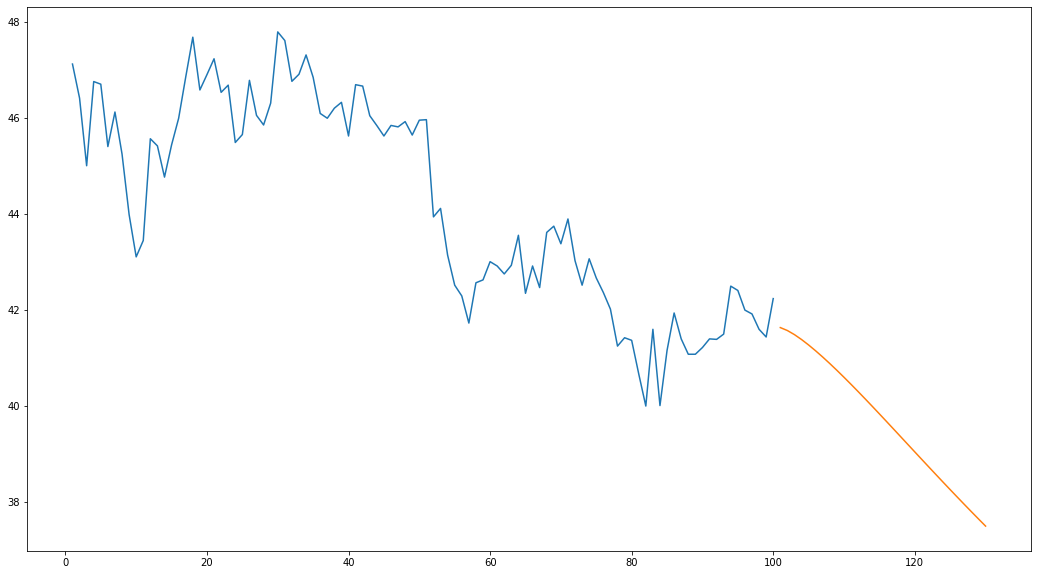

In [39]:
plt.figure(figsize=(18, 10))
plt.plot(day_new,scaler.inverse_transform(df1[969:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

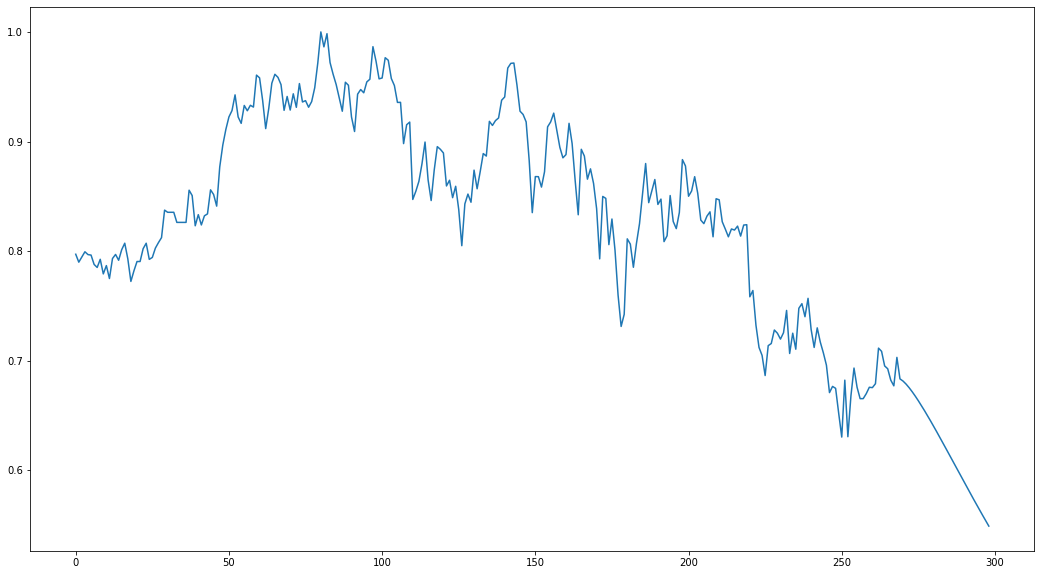

In [40]:
plt.figure(figsize=(18, 10))
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[800:])

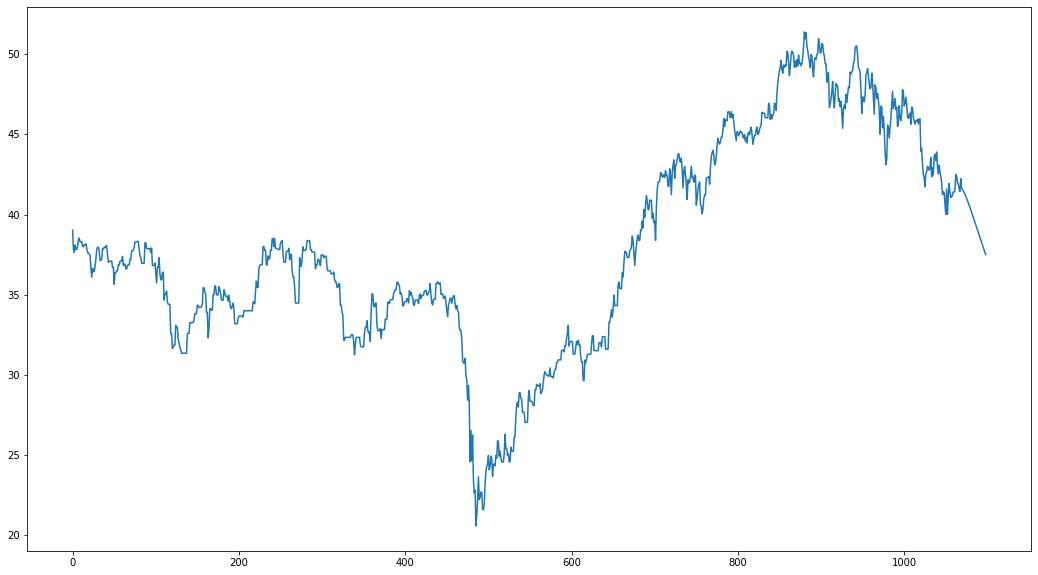

In [41]:
plt.figure(figsize=(18, 10))
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)